In [1]:
import pandas as pd
import numpy as np

from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\singh\Downloads\Telco_data_chi2_test.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
cat_features = df.select_dtypes(include='object').drop(['customerID','TotalCharges'],axis=1)
cat_features.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [8]:
cat_features.isnull().sum()

gender              0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Churn               0
dtype: int64

In [9]:
cat_features.nunique()

gender              2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
Churn               2
dtype: int64

In [10]:
le = LabelEncoder()

In [11]:
encoded = pd.DataFrame()

for col in cat_features.columns:
    encoded[col] = le.fit_transform(cat_features[col])

In [12]:
encoded.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [14]:
x_train,x_test,y_train,y_test = train_test_split(encoded.drop('Churn',axis=1),encoded['Churn'],test_size=0.2,random_state=42)

In [15]:
chi_score = chi2(x_train,y_train)
chi_score

(array([3.77925056e-01, 5.87758437e+01, 1.04146764e+02, 4.35910766e-02,
        6.52385932e+00, 7.81362845e+00, 4.39328373e+02, 1.77543358e+02,
        1.44973153e+02, 4.07908476e+02, 6.42677774e+00, 4.75256833e+00,
        8.73211647e+02, 8.45203670e+01, 4.15813286e+01]),
 array([5.38715808e-001, 1.76697343e-014, 1.87871287e-024, 8.34616268e-001,
        1.06436789e-002, 5.18536866e-003, 1.51571805e-097, 1.66657536e-040,
        2.17685970e-033, 1.04568357e-090, 1.12412336e-002, 2.92545998e-002,
        6.53708979e-192, 3.80277240e-020, 1.13067986e-010]))

In [19]:
chi2_score_series = pd.Series(chi_score[0],index=x_train.columns).sort_values(ascending=False)
p_value_series = pd.Series(chi_score[1],index=x_train.columns).sort_values()

In [21]:
chi2_score_series

Contract            873.211647
OnlineSecurity      439.328373
TechSupport         407.908476
OnlineBackup        177.543358
DeviceProtection    144.973153
Dependents          104.146764
PaperlessBilling     84.520367
Partner              58.775844
PaymentMethod        41.581329
InternetService       7.813628
MultipleLines         6.523859
StreamingTV           6.426778
StreamingMovies       4.752568
gender                0.377925
PhoneService          0.043591
dtype: float64

<AxesSubplot:>

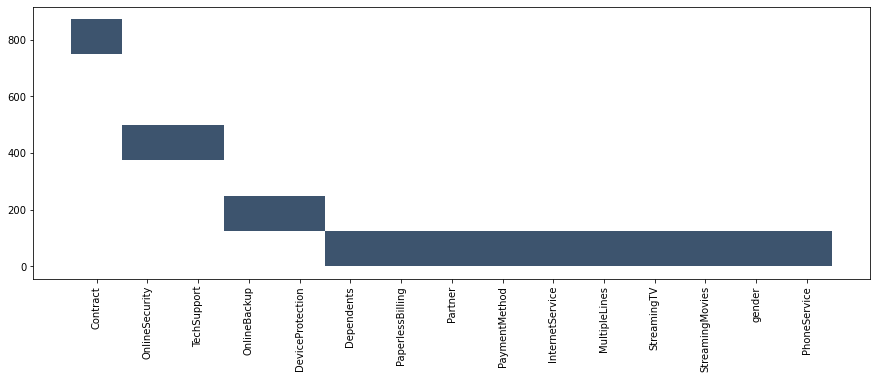

In [22]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)

sns.histplot(x=chi2_score_series.index,y=chi2_score_series.values)

<AxesSubplot:>

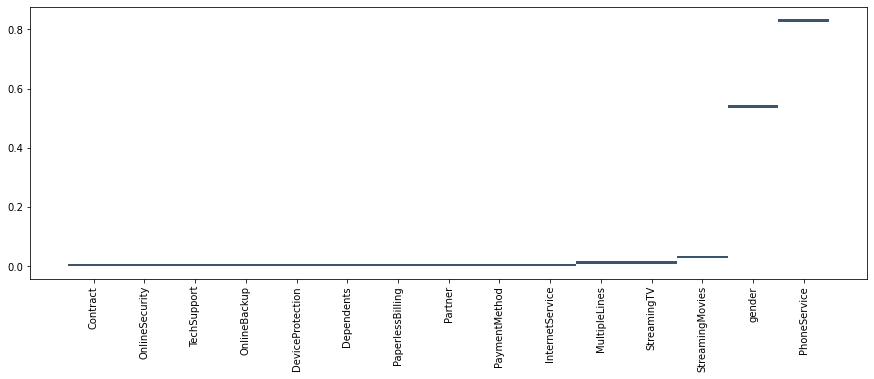

In [23]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)

sns.histplot(x=p_value_series.index,y=p_value_series.values)